# Import libraries

In [ ]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Specify dataset & model path

In [ ]:
dataset = '/content/drive/MyDrive/Colab Notebooks/dataset_static/keypoint.csv'
model_save_path = '/content/drive/MyDrive/Colab Notebooks/model/static_gesture_final.keras'
tflite_save_path = '/content/drive/MyDrive/Colab Notebooks/model/static_gesture_final.tflite'

# Set number of classes

In [ ]:
NUM_CLASSES = 4

# Dataset reading

In [ ]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [ ]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()  #tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dropout (Dropout)                    │ (None, 42)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 20)                  │             860 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 20)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              44 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,114 (4.35 KB)

 Trainable params: 1,114 (4.35 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
#Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [ ]:
# Model compilation
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model training

In [ ]:
model.fit(X_train, y_train, epochs=1000, batch_size=128, validation_data=(X_test, y_test), callbacks=[cp_callback, es_callback])

Epoch 1/1000
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step - accuracy: 0.2795 - loss: 1.4699
Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/model/static_gesture_final.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 292ms/step - accuracy: 0.2784 - loss: 1.4694 - val_accuracy: 0.2976 - val_loss: 1.3898
Epoch 2/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3359 - loss: 1.3875
Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/model/static_gesture_final.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3099 - loss: 1.3807 - val_accuracy: 0.3927 - val_loss: 1.3229
Epoch 3/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.3750 - loss: 1.3097
Epoch 3: saving model to /content/drive/MyDrive/Colab Notebooks/model/static_gesture_final.keras
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3703 - loss: 1.3250 - val_accuracy: 0.4683 - val_loss: 1.2685
Epoch 4/1000
 1/10 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.3828 - loss: 1.3252
Epoch 4: sa

In [ ]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9893 - loss: 0.1127 


In [ ]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [ ]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step
[6.2155295e-03 1.7900398e-05 9.9374008e-01 2.6533402e-05]
2


# Evaluation: Confusion matrix

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


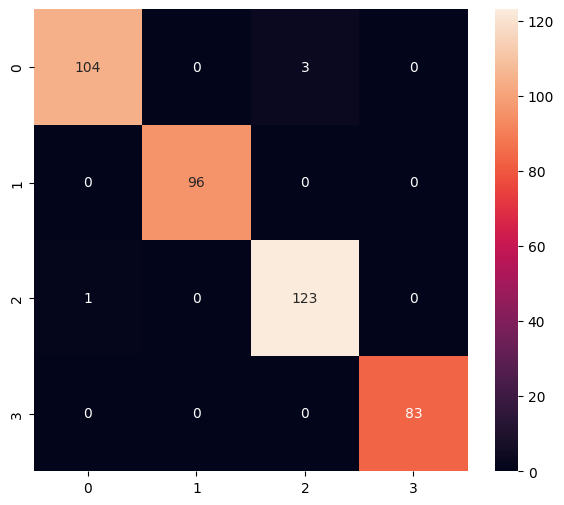

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       107
           1       1.00      1.00      1.00        96
           2       0.98      0.99      0.98       124
           3       1.00      1.00      1.00        83

    accuracy                           0.99       410
   macro avg       0.99      0.99      0.99       410
weighted avg       0.99      0.99      0.99       410



In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)

    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)

    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()

    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Inference test

In [ ]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [ ]:
#Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [ ]:
%%time
#Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 505 µs, sys: 0 ns, total: 505 µs
Wall time: 353 µs


In [ ]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.2155202e-03 1.7900380e-05 9.9374008e-01 2.6533375e-05]
2
